In [10]:
# Importar bibliotecas

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
# Carregar dataset

df = pd.read_csv('train.csv')
print ('Dados do arquivo')
df.head()

Dados do arquivo


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
#Tipos de dados
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [15]:
# Informações colunas
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [23]:
# Extraindo título dos nomes
def titulo(df2):
    df2['Titulo']= df.Name.apply(lambda x:x.split(',')[1].split('.')[0].strip().lower())
titulo(df)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Titulo
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,mr


In [26]:
#Verificando se é mãe
df['Mae']= np.where((df['Sex']=='female') & (df['Parch']>=1) & (df['Age']> 18),1,0)
print(df)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

Exploração dos dados

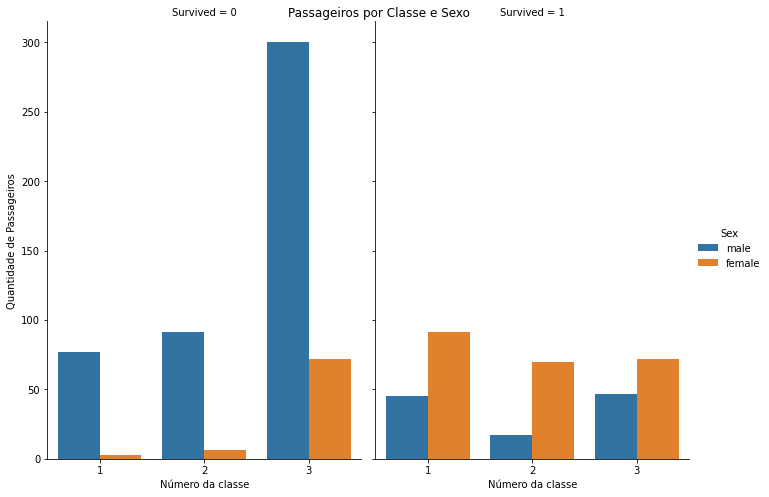

In [22]:
g = sns.catplot(x='Pclass', hue='Sex', col = 'Survived', data=df, kind = 'count', height=7, aspect=0.7)
g.fig.suptitle('Passageiros por Classe e Sexo')
g.set_ylabels('Quantidade de Passageiros')
g.set_xlabels('Número da classe');

In [30]:
a = df.groupby('Pclass').agg({'Survived':['sum','count'],'Age':np.mean, 'Titulo':(pd.Series.nunique),'Mae':np.sum})
a = pd.DataFrame(a)
a['Survived', 'Percentual_Sobrevivente'] = round(a['Survived']['sum']/ a['Survived']['count'].values *100,2)
a                                                                       
                                                                    

Survived              Age  Titulo Mae                Survived
            sum count       mean nunique sum Percentual_Sobrevivente
Pclass                                                              
1           136   216  38.233441      15  22                   62.96
2            87   184  29.877630       7  20                   47.28
3           119   491  25.140620       4  22                   24.24

<AxesSubplot:xlabel='Sex', ylabel='Age'>

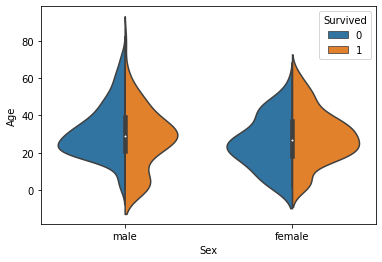

In [33]:
sns.violinplot(x ="Sex", y ="Age", hue ="Survived",
data = df, split = True)

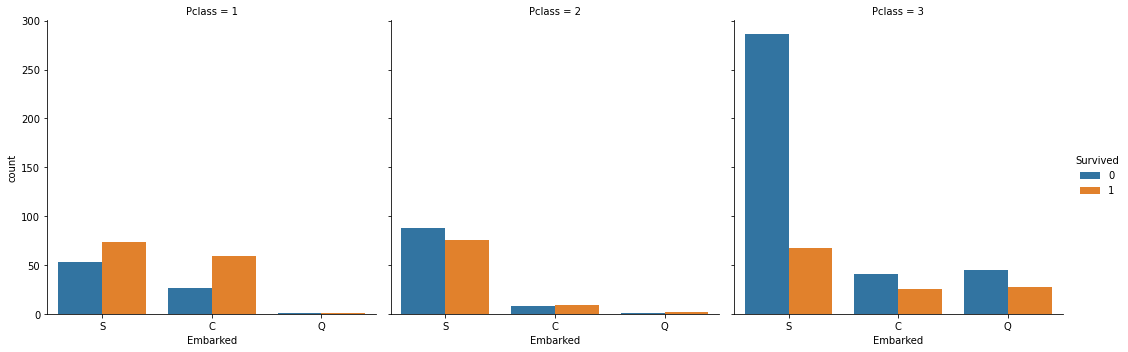

In [40]:
sns.catplot(x ='Embarked', hue ='Survived',
kind ='count', col ='Pclass', data = df)

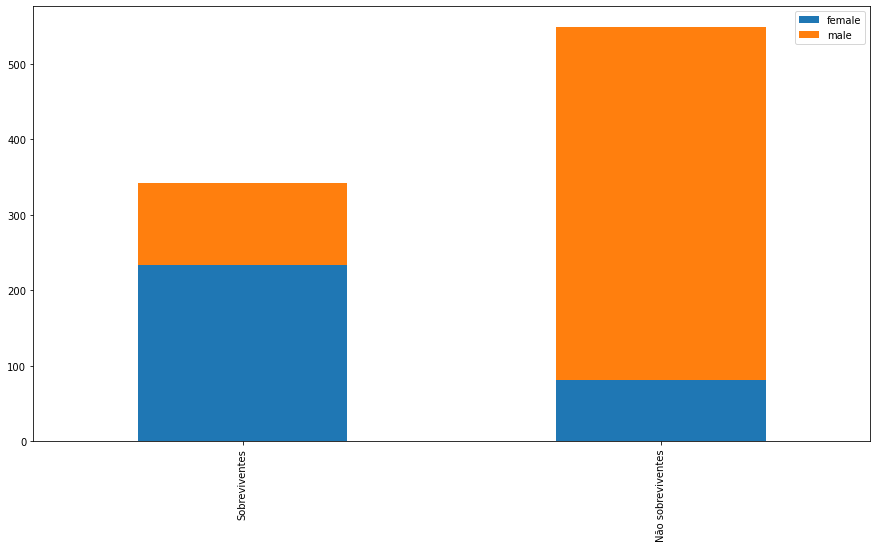

In [45]:
survived_sex = df[df['Survived']==1]['Sex'].value_counts()
dead_sex = df[df['Survived']==0]['Sex'].value_counts()
df2 = pd.DataFrame([survived_sex,dead_sex])
df2.index = ['Sobreviventes','Não sobreviventes']
df2.plot(kind='bar',stacked=True, figsize=(15,8));


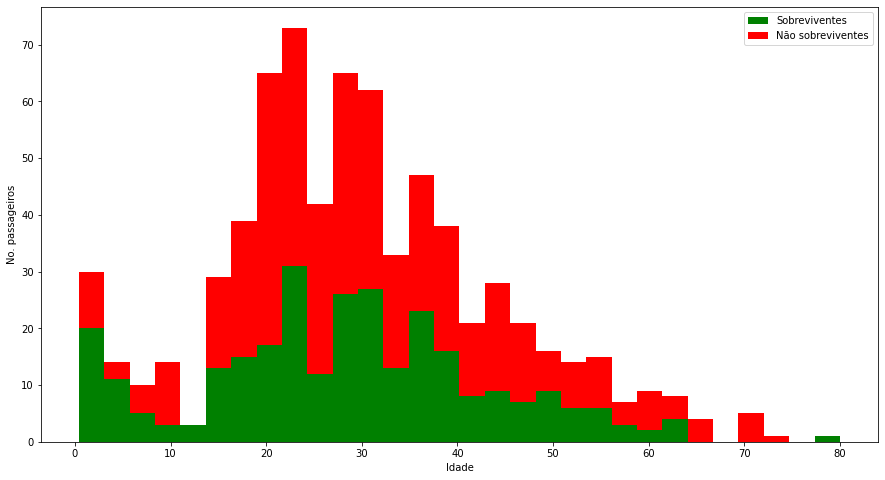

In [46]:
figure = plt.figure(figsize=(15,8))
plt.hist([df[df['Survived']==1]['Age'], df[df['Survived']==0]['Age']], 
         stacked=True, color=['g','r'],
         bins=30, label=['Sobreviventes','Não sobreviventes'])
plt.xlabel('Idade')
plt.ylabel('No. passageiros')
plt.legend();

<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

<Figure size 1080x576 with 0 Axes>

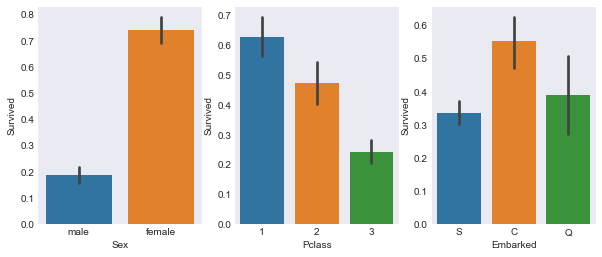

In [48]:

# Tamanho
plt.figure( figsize=(15, 8) )

# estilo
plt.style.use('seaborn-dark')

fig, (axis1, axis2, axis3) = plt.subplots(1,3, figsize=(10,4))

#plt.title('Grupos mais chances de sobrevivência', fontsize=20, fontweight='bold')

sns.barplot(x='Sex', y= 'Survived', data=df, ax=axis1)
sns.barplot(x='Pclass', y= 'Survived', data=df, ax=axis2)
sns.barplot(x='Embarked', y= 'Survived', data=df, ax=axis3)